In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,item_identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Null values are present in item_weigth and outlet_size

In [5]:
# Check for null values in each column
null_values = data.isnull().sum()

# Display the columns with the number of null values
print(null_values)

item_identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


# Grouping total sales by outlet type

In [6]:

# Assuming your DataFrame is named 'data'
# Group data by 'Outlet_Type' and sum the 'Sale' column
total_sale_per_type = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# Print the total sale for each outlet type
print(total_sale_per_type)


Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64


In [7]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# Group data by 'Outlet_Type' and count the number of rows in each group
num_items_per_type = data.groupby('Outlet_Type').size()

# Print the number of items for each outlet type
print(num_items_per_type)


Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
dtype: int64


# ANLYZING THE DATA THROUGH BOXPLOT FOR DETECTING OUTLIERS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

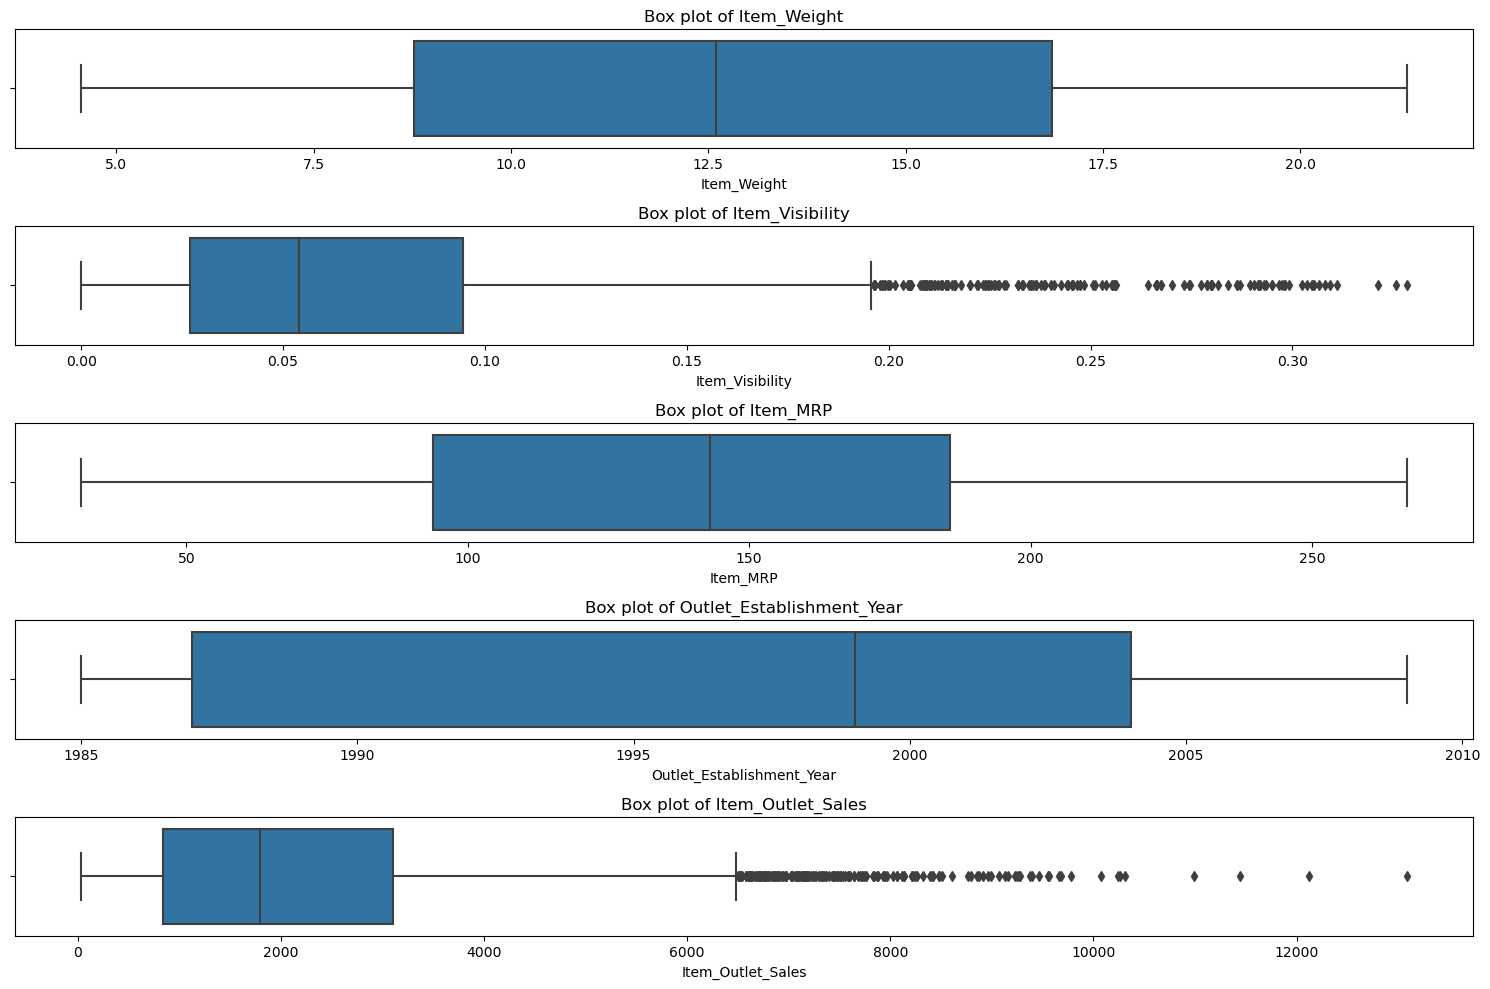

In [8]:
# Create box plots for each column to visualize outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

# AS WE CAN SEE OUTLIERS IN THE ITEM VISIBILITY COLUMN AND ITEM OUTLET SALES

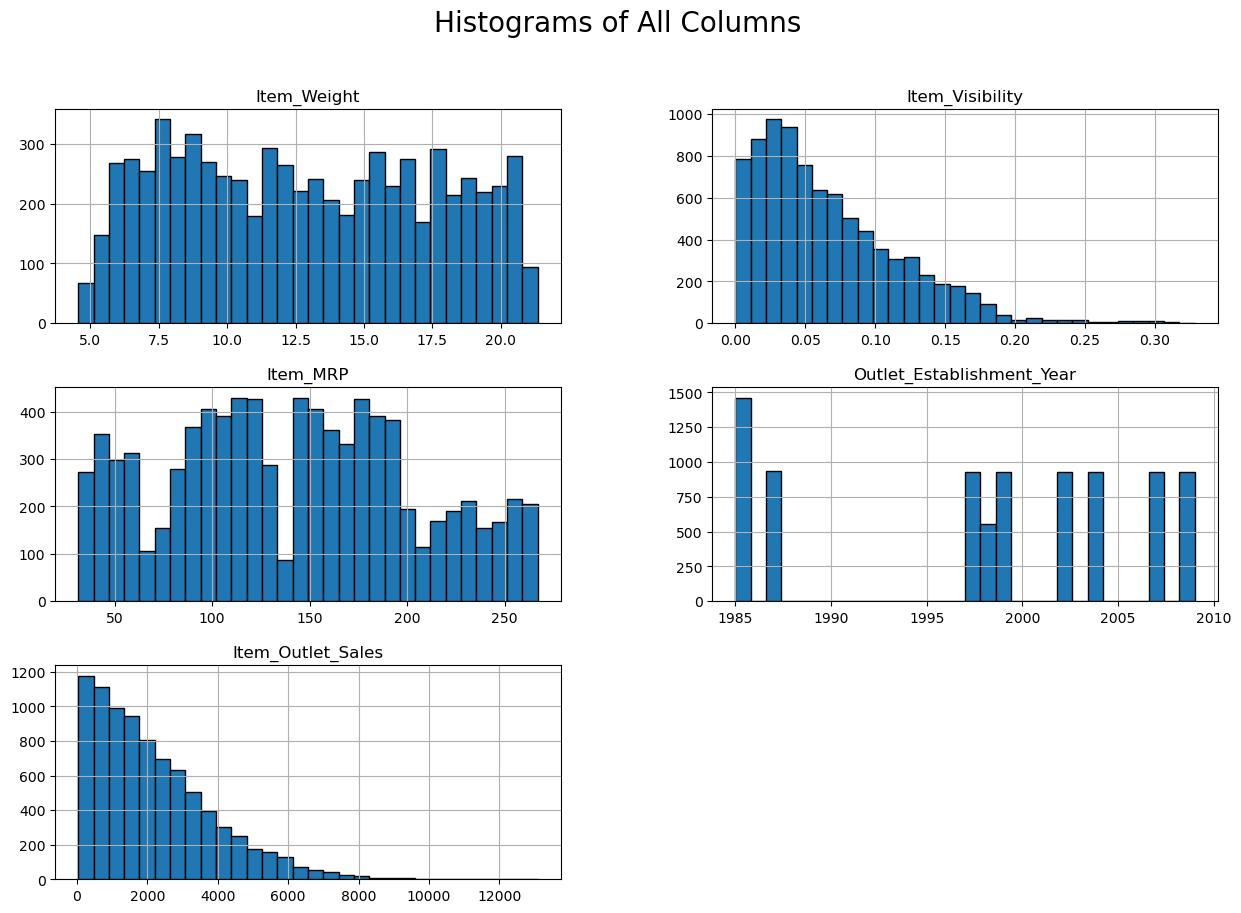

In [9]:
# Plot histograms for each column
data.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Columns', fontsize=20)
plt.show()

In [10]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Remove duplicates
data = data.drop_duplicates()

Duplicates: 0


# There are some irregular value in the item fat content we need to handle them

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

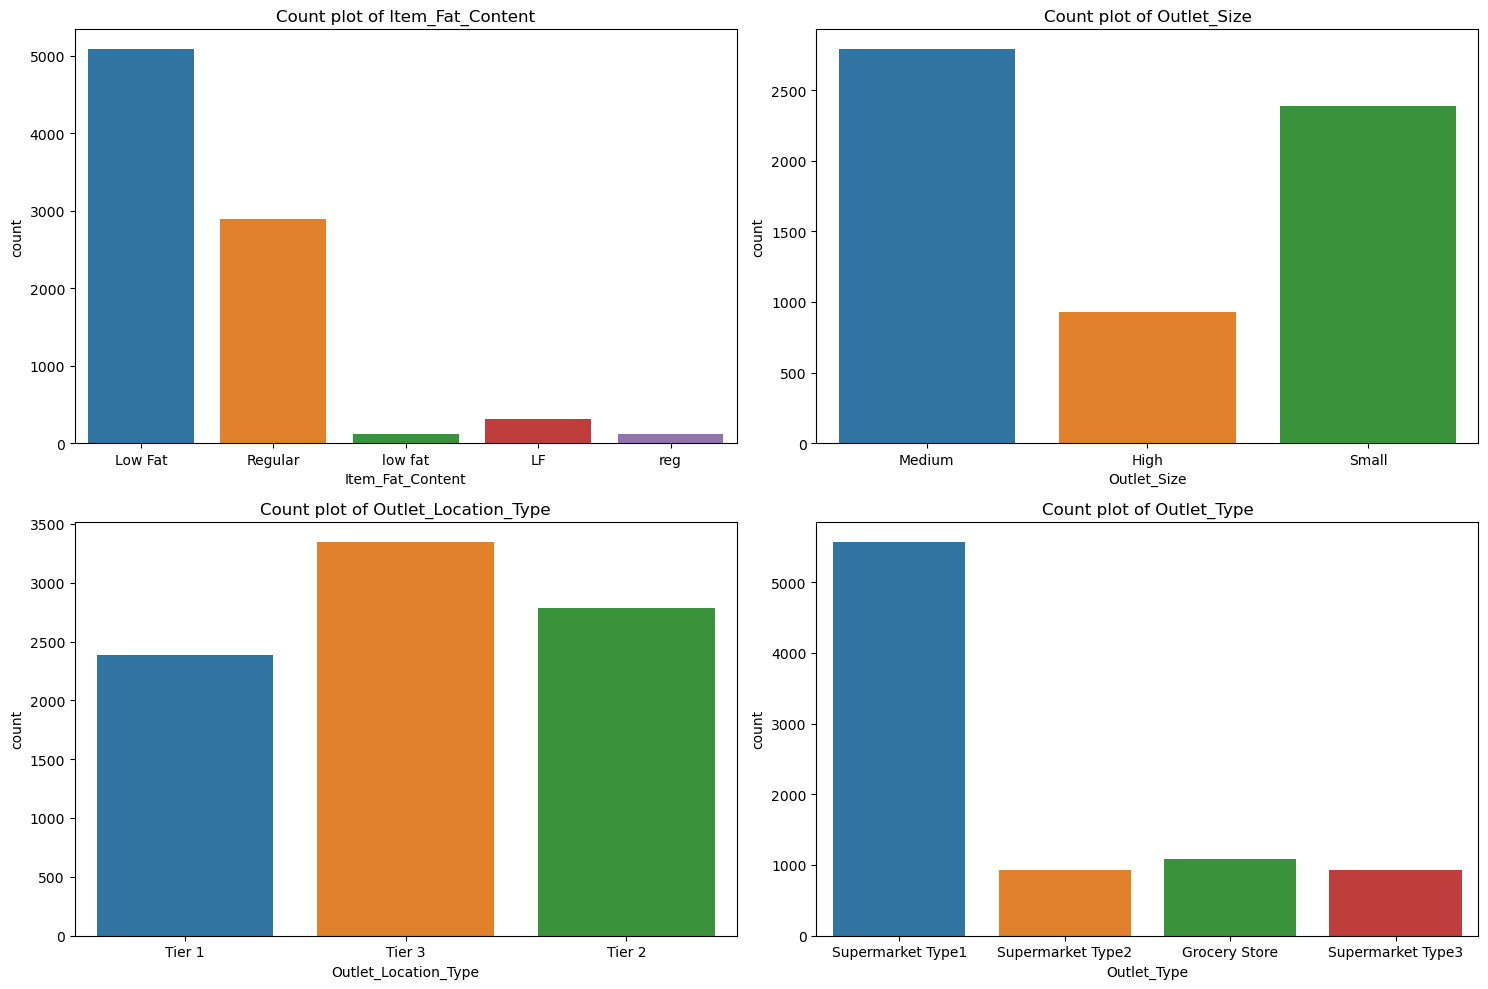

In [11]:
import seaborn as sns

# Bar plots for categorical columns
categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data[column])
    plt.title(f'Count plot of {column}')
plt.tight_layout()
plt.show()

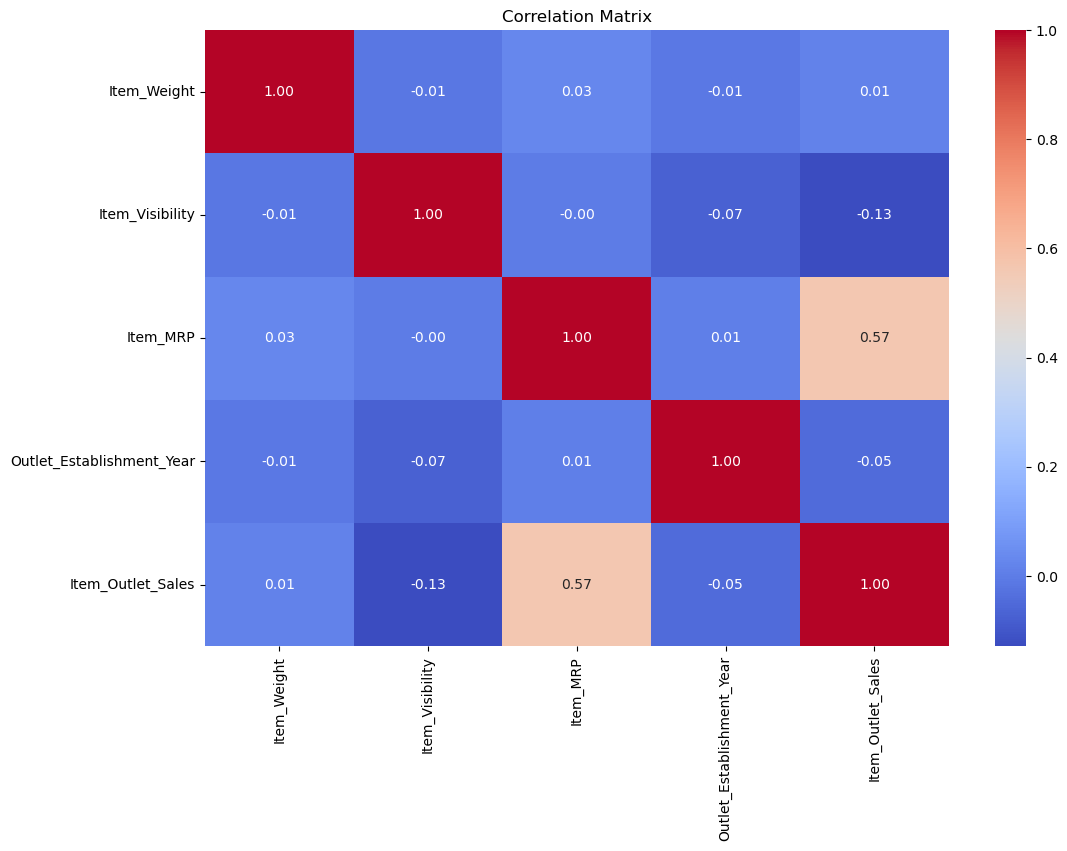

In [12]:
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

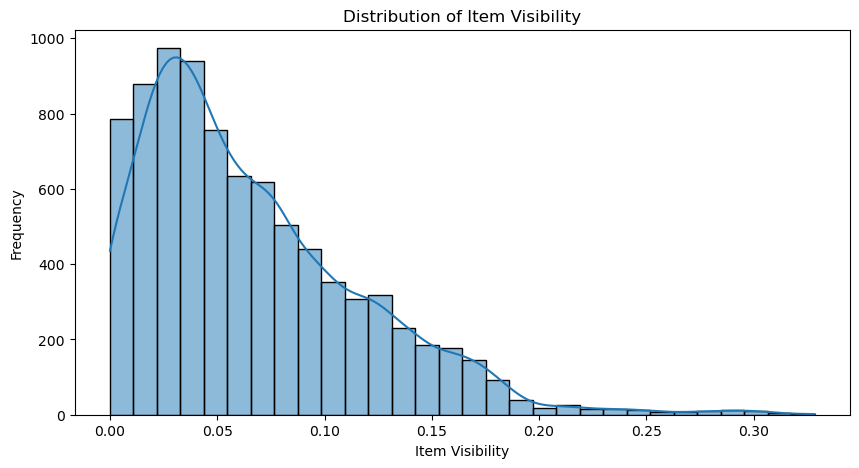

In [13]:
# Plot the distribution of Item Visibility
plt.figure(figsize=(10, 5))
sns.histplot(data['Item_Visibility'], bins=30, kde=True)
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

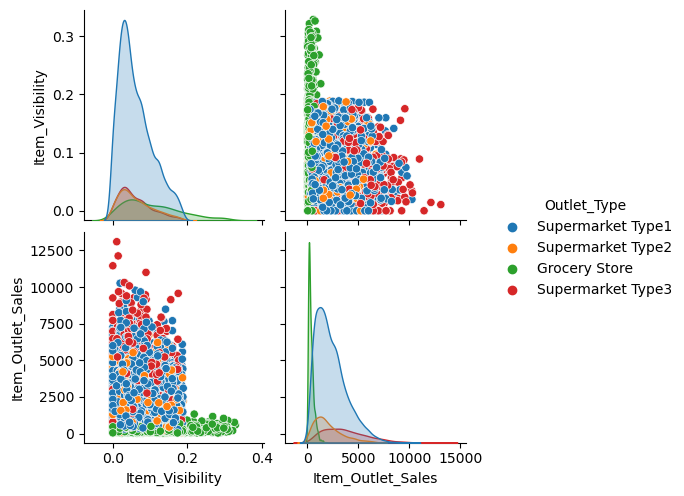

In [14]:
# Pairplot to visualize relationships
sns.pairplot(data[['Item_Visibility', 'Item_Outlet_Sales', 'Item_Type', 'Outlet_Type']], hue='Outlet_Type')
plt.show()

In [15]:

# Assuming your DataFrame is named 'data' and the column you want to check is 'columnName'
unique_values = data['Outlet_Type'].unique()

# Print the number of unique values
print(f"Number of unique values in '{'Outlet_Type'}': {len(unique_values)}")

# Print the actual unique values (optional)
print(f"Unique values: {unique_values}")

Number of unique values in 'Outlet_Type': 4
Unique values: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [16]:
import pandas as pd

# Load your dataset
#data = pd.read_csv('d-mart-sales-data.csv')

# Group by Item Fat Content and sum the sales
fat_content_sales = data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index()

# Print the aggregated data
print(fat_content_sales)

  Item_Fat_Content  Item_Outlet_Sales
0               LF       6.552424e+05
1          Low Fat       1.101503e+07
2          Regular       6.457454e+06
3          low fat       2.338270e+05
4              reg       2.295765e+05


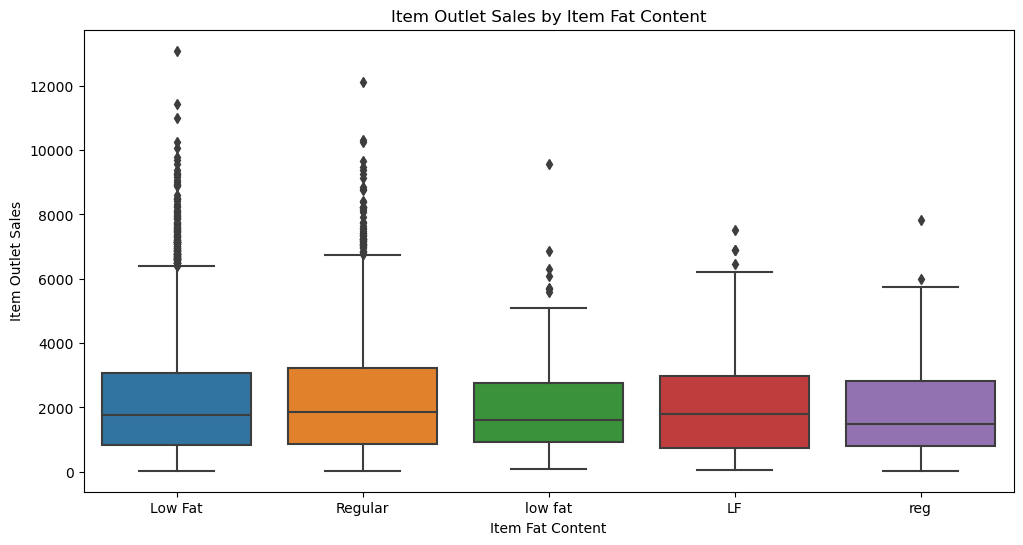

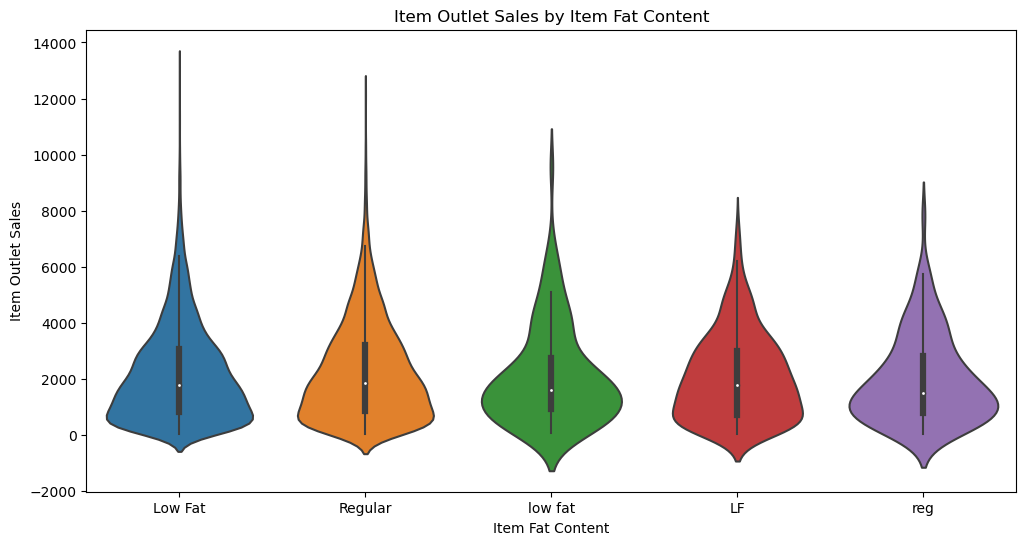

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)
plt.title('Item Outlet Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)
plt.title('Item Outlet Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

In [18]:


# Standardize fat content labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular', 'RF': 'Regular'})

# Verify the changes
print(data['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [19]:
# Group by Item Fat Content and sum the sales
fat_content_sales = data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index()

# Group by Item Fat Content and Outlet Type, sum the sales
fat_content_outlet_type_sales = data.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index()

# Group by Item Fat Content and Outlet Location Type, sum the sales
fat_content_location_type_sales = data.groupby(['Item_Fat_Content', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum().reset_index()

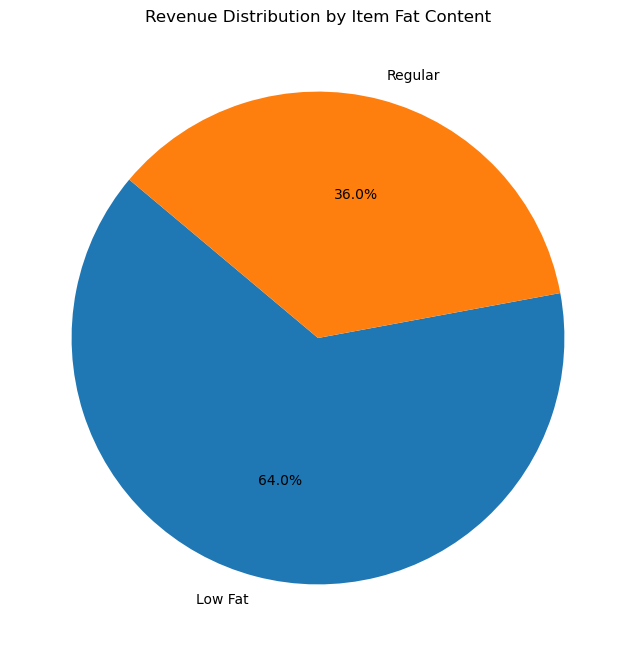

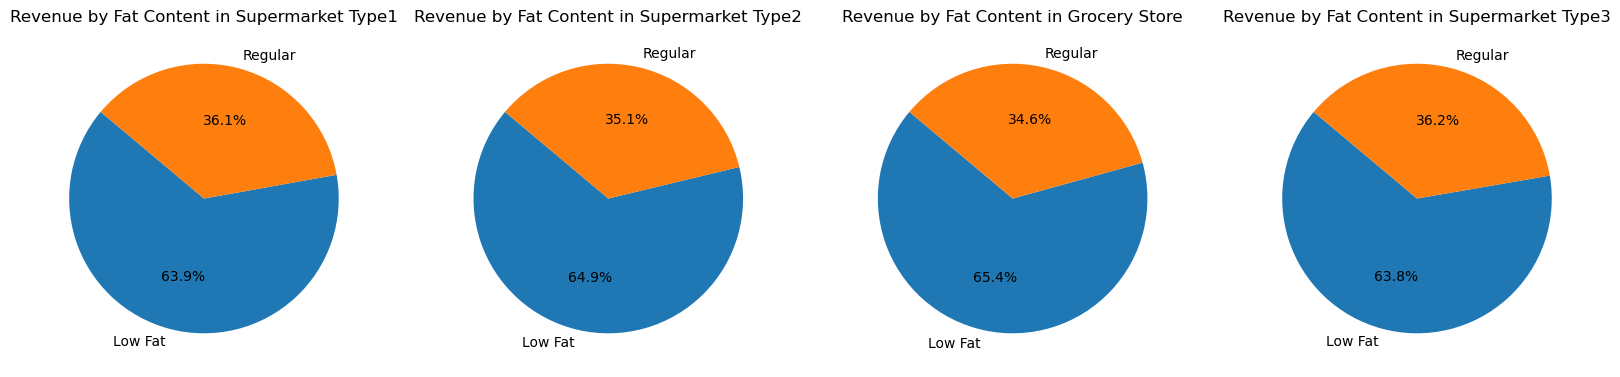

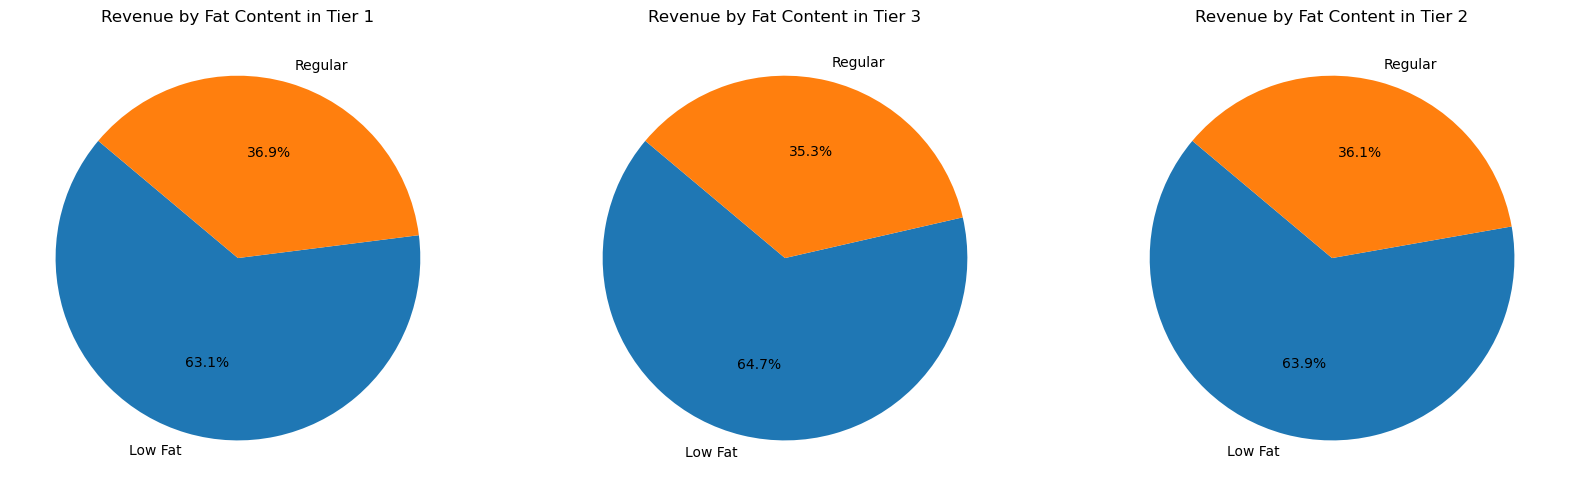

In [20]:
import matplotlib.pyplot as plt

# Pie Chart for overall sales by fat content
plt.figure(figsize=(8, 8))
plt.pie(fat_content_sales['Item_Outlet_Sales'], labels=fat_content_sales['Item_Fat_Content'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Item Fat Content')
plt.show()

# Pie Charts for sales by fat content and outlet type
outlet_types = data['Outlet_Type'].unique()
fig, axs = plt.subplots(1, len(outlet_types), figsize=(20, 10))
for i, outlet in enumerate(outlet_types):
    subset = fat_content_outlet_type_sales[fat_content_outlet_type_sales['Outlet_Type'] == outlet]
    axs[i].pie(subset['Item_Outlet_Sales'], labels=subset['Item_Fat_Content'], autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Revenue by Fat Content in {outlet}')
plt.show()

# Pie Charts for sales by fat content and outlet location type
location_types = data['Outlet_Location_Type'].unique()
fig, axs = plt.subplots(1, len(location_types), figsize=(20, 10))
for i, location in enumerate(location_types):
    subset = fat_content_location_type_sales[fat_content_location_type_sales['Outlet_Location_Type'] == location]
    axs[i].pie(subset['Item_Outlet_Sales'], labels=subset['Item_Fat_Content'], autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Revenue by Fat Content in {location}')
plt.show()

# From the above graph we can conclude that item having low fat content have higher sale 

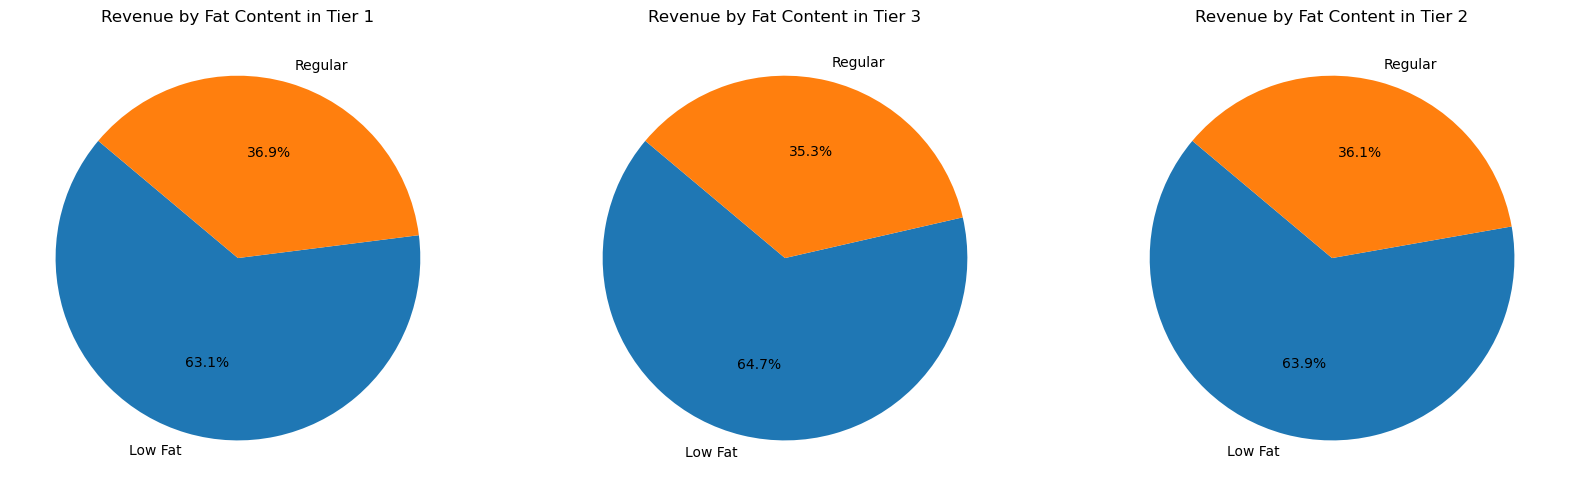

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
#data = pd.read_csv('d-mart-sales-data.csv')

# Standardize fat content labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular', 'RF': 'Regular'})

# Group by Item Fat Content and Outlet Location Type, sum the sales
fat_content_location_type_sales = data.groupby(['Item_Fat_Content', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum().reset_index()

# Pie Charts for sales by fat content and outlet location type
location_types = data['Outlet_Location_Type'].unique()
fig, axs = plt.subplots(1, len(location_types), figsize=(20, 10))
for i, location in enumerate(location_types):
    subset = fat_content_location_type_sales[fat_content_location_type_sales['Outlet_Location_Type'] == location]
    axs[i].pie(subset['Item_Outlet_Sales'], labels=subset['Item_Fat_Content'], autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Revenue by Fat Content in {location}')
plt.show()

In [22]:
import pandas as pd

# Load your dataset
#data = pd.read_csv('d-mart-sales-data.csv')

# Standardize fat content labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular', 'RF': 'Regular'})

In [23]:
# Group by Item Fat Content and Outlet Location Type, sum the sales
fat_content_location_type_sales = data.groupby(['Item_Fat_Content', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum().reset_index()

# Print the aggregated data for verification
print(fat_content_location_type_sales)

  Item_Fat_Content Outlet_Location_Type  Item_Outlet_Sales
0          Low Fat               Tier 1       2.828747e+06
1          Low Fat               Tier 2       4.134787e+06
2          Low Fat               Tier 3       4.940560e+06
3          Regular               Tier 1       1.653312e+06
4          Regular               Tier 2       2.337527e+06
5          Regular               Tier 3       2.696192e+06


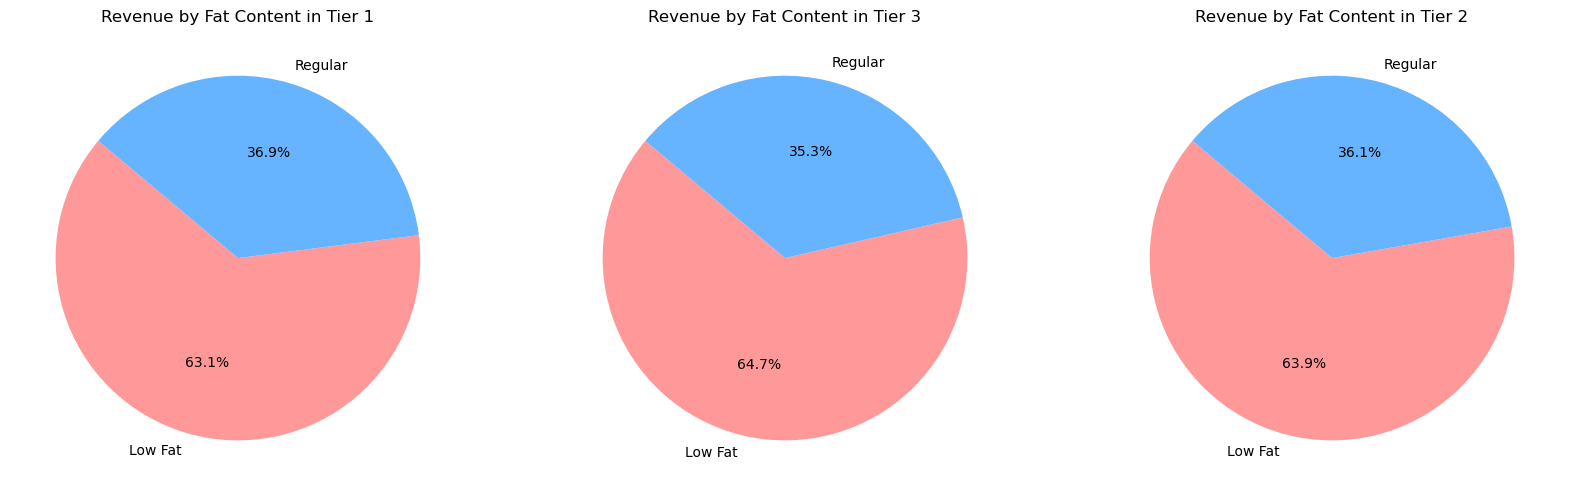

In [24]:
import matplotlib.pyplot as plt

# Get unique outlet location types
location_types = data['Outlet_Location_Type'].unique()

# Create pie charts
fig, axs = plt.subplots(1, len(location_types), figsize=(20, 10))

for i, location in enumerate(location_types):
    subset = fat_content_location_type_sales[fat_content_location_type_sales['Outlet_Location_Type'] == location]
    axs[i].pie(subset['Item_Outlet_Sales'], labels=subset['Item_Fat_Content'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    axs[i].set_title(f'Revenue by Fat Content in {location}')

plt.show()

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder



In [26]:
# Standardize categorical values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

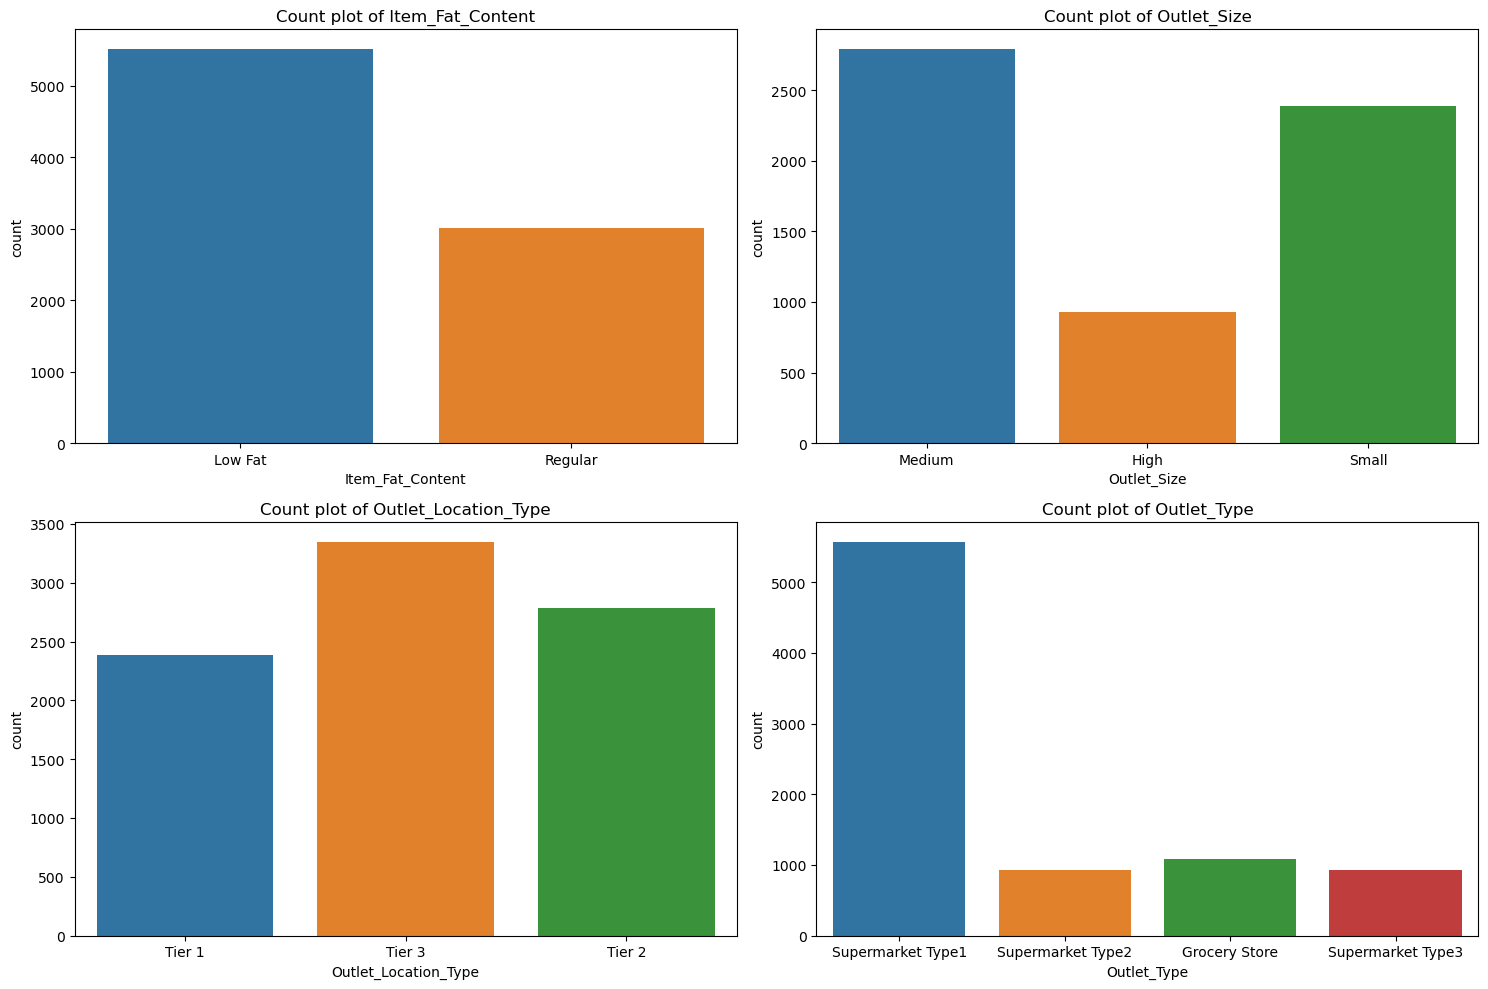

In [27]:
import seaborn as sns

# Bar plots for categorical columns
categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data[column])
    plt.title(f'Count plot of {column}')
plt.tight_layout()
plt.show()

# HANDLING MISSING VALUES IN ITEM WIEIGHT BY REPLACING IT WITH MEAN VALUES

In [28]:
# Fill missing values in 'Item Weight' with the mean value
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# Find the most frequent value (mode) in 'Outlet Size'
most_frequent_value = data['Outlet_Size'].mode()[0]

# Fill missing values in 'Outlet Size' with the most frequent value
data['Outlet_Size'].fillna(most_frequent_value, inplace=True)

In [29]:
# Check for null values in each column
null_values = data.isnull().sum()

# Display the columns with the number of null values
print(null_values)

item_identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


# HANDLING OUTLIERS WITH Z SCORE

In [30]:
# Calculate IQR for 'Item Visibility'
Q1_visibility = data['Item_Visibility'].quantile(0.25)
Q3_visibility = data['Item_Visibility'].quantile(0.75)
IQR_visibility = Q3_visibility - Q1_visibility

# Define bounds for 'Item Visibility'
lower_bound_visibility = Q1_visibility - 1.5 * IQR_visibility
upper_bound_visibility = Q3_visibility + 1.5 * IQR_visibility

# Identify outliers in 'Item Visibility'
outliers_visibility = data[(data['Item_Visibility'] < lower_bound_visibility) | (data['Item_Visibility'] > upper_bound_visibility)]

# Calculate IQR for 'Item Outlet Sales'
Q1_sales = data['Item_Outlet_Sales'].quantile(0.25)
Q3_sales = data['Item_Outlet_Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Define bounds for 'Item Outlet Sales'
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Identify outliers in 'Item Outlet Sales'
outliers_sales = data[(data['Item_Outlet_Sales'] < lower_bound_sales) | (data['Item_Outlet_Sales'] > upper_bound_sales)]

# Count and percentage of outliers
outliers_visibility_count = len(outliers_visibility)
outliers_sales_count = len(outliers_sales)

outliers_visibility_percentage = (outliers_visibility_count / len(data)) * 100
outliers_sales_percentage = (outliers_sales_count / len(data)) * 100

print(f'Number of outliers in Item Visibility: {outliers_visibility_count}')
print(f'Percentage of outliers in Item Visibility: {outliers_visibility_percentage:.2f}%')
print(f'Number of outliers in Item Outlet Sales: {outliers_sales_count}')
print(f'Percentage of outliers in Item Outlet Sales: {outliers_sales_percentage:.2f}%')

Number of outliers in Item Visibility: 144
Percentage of outliers in Item Visibility: 1.69%
Number of outliers in Item Outlet Sales: 186
Percentage of outliers in Item Outlet Sales: 2.18%


In [31]:
# Replace outliers with the closest non-outlier values (capping approach)
data.loc[data['Item_Visibility'] < lower_bound_visibility, 'Item_Visibility'] = lower_bound_visibility
data.loc[data['Item_Visibility'] > upper_bound_visibility, 'Item_Visibility'] = upper_bound_visibility

data.loc[data['Item_Outlet_Sales'] < lower_bound_sales, 'Item_Outlet_Sales'] = lower_bound_sales
data.loc[data['Item_Outlet_Sales'] > upper_bound_sales, 'Item_Outlet_Sales'] = upper_bound_sales

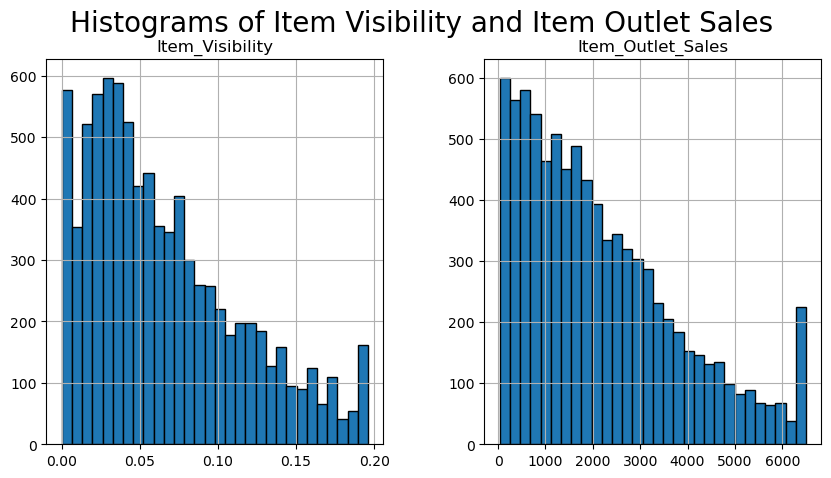

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


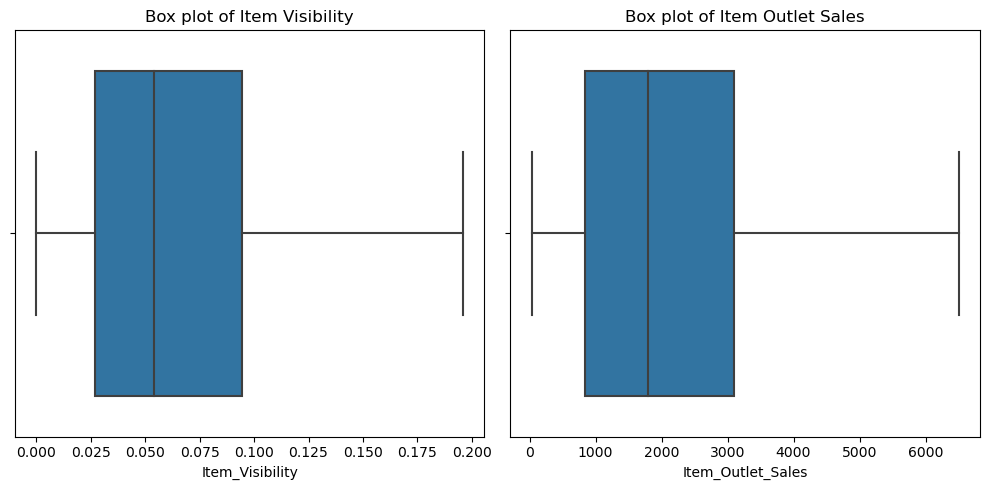

In [32]:
# Plot histograms
data[['Item_Visibility', 'Item_Outlet_Sales']].hist(figsize=(10, 5), bins=30, edgecolor='black')
plt.suptitle('Histograms of Item Visibility and Item Outlet Sales', fontsize=20)
plt.show()

# Plot box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data['Item_Visibility'])
plt.title('Box plot of Item Visibility')
plt.subplot(1, 2, 2)
sns.boxplot(data['Item_Outlet_Sales'])
plt.title('Box plot of Item Outlet Sales')
plt.tight_layout()
plt.show()

In [33]:
# Display minimum and maximum values for all numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
min_max_values = data[numerical_columns].agg(['min', 'max'])

print("Minimum and Maximum Values for Numerical Columns:")
print(min_max_values)

Minimum and Maximum Values for Numerical Columns:
     Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
min        4.555         0.000000   31.2900                       1985   
max       21.350         0.195979  266.8884                       2009   

     Item_Outlet_Sales  
min            33.2900  
max          6501.8699  


In [34]:
total_values = data.count()

print("Total Number of Values in Each Column:")
print(total_values)

Total Number of Values in Each Column:
item_identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64


# The item visibilty column conatins values as zero . Replacing all zeroes with median values 

In [35]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Count and print zeros in each numerical column
for col in numerical_columns:
    zero_count = (data[col] == 0).sum()  # Count zeros in the column
    if zero_count > 0:
        print(f"Column '{col}' has {zero_count} zero values.")

Column 'Item_Visibility' has 526 zero values.


In [36]:
# Replace zeros and very small values in 'Item_Weight' with median
median_weight = data['Item_Visibility'].median()
data['Item_Visibility'].replace(0, median_weight, inplace=True)
data.loc[data['Item_Weight'] < 0.0001, 'Item_Weight'] = median_weight  # Adjust threshold as needed

# Check unique values and verify replacement
unique_values = data['Item_Weight'].unique()
print("Unique values after replacement:")
print(unique_values)

Unique values after replacement:
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65       12.85764518 16.2        11.8        18.5        15.1
 17.6        16.35        9.         13.35       18.85       14.6
 13.85       13.          7.645      11.65        5.925      19.25
 18.6        18.7        17.85       10.          8.85        9.8
 13.6        21.35       12.15        6.42       19.6        15.85
  7.39       10.195       9.895      10.895       7.905       9.195
  8.365       7.97       17.7        19.35        8.645      15.6
 18.25        7.855       7.825       8.39       12.85       19.
  5.905       7.76       16.75       15.5         6.055       6.305
 20.85       20.75        8.895      19.7         8.75       13.3
  8.31       19.75       17.1        10.5         6.635      14.15
  8.89        9.1         7.5        16.85        7.485      11.6
 12.65       20.25        8.6        12.6         8.88       20.5
 13.5         7.235       6.92     

# FEATURE ENGINEERING AND COLUMN TRANFORMATION

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load your dataset
#data = pd.read_csv('d-mart-sales-data.csv')

# Handling zeros in 'Item_Visibility' column (replace with NaN)
data.loc[data['Item_Visibility'] == 0, 'Item_Visibility'] = float('nan')

# Define columns for scaling
columns_minmax = ['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year']
columns_standard = ['Item_Outlet_Sales', 'Item_MRP']

# Min-Max Scaling for columns with zeros handled in 'Item_Visibility'
scaler_minmax = MinMaxScaler()
data[columns_minmax] = scaler_minmax.fit_transform(data[columns_minmax])

# Z-score Normalization
scaler_standard = StandardScaler()
data[columns_standard] = scaler_standard.fit_transform(data[columns_standard])

# Print transformed data (example)
print("Transformed Data:")
print(data.head())

Transformed Data:
  item_identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     0.282525          Low Fat         0.064825   
1           DRC01     0.081274          Regular         0.081617   
2           FDN15     0.770765          Low Fat         0.068530   
3           FDX07     0.871986          Regular         0.261721   
4           NCD19     0.260494          Low Fat         0.261721   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  1.747454            OUT049   
1            Soft Drinks -1.489023            OUT018   
2                   Meat  0.010040            OUT049   
3  Fruits and Vegetables  0.660050            OUT010   
4              Household -1.399220            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                   0.583333      Medium               Tier 1   
1                   1.000000      Medium               Tier 3   
2                   0.583333      Medium 

In [38]:


# Function to split and extract
def split_and_extract(data):
    # Check if the column exists before renaming
    if 'Outlet_Location_Type' in data.columns:
        # Rename the column
        data.rename(columns={'Outlet_Location_Type': 'Outlet Location Tier Type'}, inplace=True)
        
        # Extract numeric part (assuming numbers are at the end)
        data['Tier Number'] = data['Outlet Location Tier Type'].str.extract('(\d+)$')
        
        # Drop the original column
        data.drop('Outlet Location Tier Type', axis=1, inplace=True)
        
        # Handle cases where no number exists (consider filling with NaN or a default value)
        data['Tier Number'].fillna('NA', inplace=True)  # Example handling for missing values
    else:
        print("Column 'Outlet_Location_Type' not found in the DataFrame.")

    return data

# Apply the function to the DataFrame
data = split_and_extract(data.copy())  # Operate on a copy to avoid modifying original data

# Print the updated DataFrame
print(data)


     item_identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     0.282525          Low Fat         0.064825   
1              DRC01     0.081274          Regular         0.081617   
2              FDN15     0.770765          Low Fat         0.068530   
3              FDX07     0.871986          Regular         0.261721   
4              NCD19     0.260494          Low Fat         0.261721   
...              ...          ...              ...              ...   
8518           FDF22     0.137541          Low Fat         0.276546   
8519           FDS36     0.227746          Regular         0.225607   
8520           NCJ29     0.359929          Low Fat         0.164298   
8521           FDN46     0.158083          Regular         0.736189   
8522           DRG01     0.610003          Low Fat         0.214671   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  1.747454            OUT049   
1               Soft Drinks -

In [39]:
import pandas as pd

# Load your dataset
#data = pd.read_csv('train.csv')

# Define a function to split the item_identifier
def split_item_identifier(identifier):
    text_part = ''.join(filter(str.isalpha, identifier))
    numeric_part = ''.join(filter(str.isdigit, identifier))
    return text_part, numeric_part

# Apply the function to the item_identifier column
split_columns = data['item_identifier'].apply(split_item_identifier).apply(pd.Series)
split_columns.columns = ['item_text', 'item_number']

# Concatenate the new columns to the original dataframe
data = pd.concat([data, split_columns], axis=1)

# Drop the original item_identifier column
data.drop('item_identifier', axis=1, inplace=True)

# Verify the columns are split correctly and the original column is dropped
print("DataFrame after splitting 'item_identifier' and dropping the original column:")
print(data.head())

DataFrame after splitting 'item_identifier' and dropping the original column:
   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0     0.282525          Low Fat         0.064825                  Dairy   
1     0.081274          Regular         0.081617            Soft Drinks   
2     0.770765          Low Fat         0.068530                   Meat   
3     0.871986          Regular         0.261721  Fruits and Vegetables   
4     0.260494          Low Fat         0.261721              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  1.747454            OUT049                   0.583333      Medium   
1 -1.489023            OUT018                   1.000000      Medium   
2  0.010040            OUT049                   0.583333      Medium   
3  0.660050            OUT010                   0.541667      Medium   
4 -1.399220            OUT013                   0.083333        High   

         Outlet_Type  Item_Outlet_Sale

In [40]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'dataset.csv'
# Load the dataset
#df = pd.read_csv('dataset.csv')

# Extracting numeric part and creating a new column
data['Outlet_Identifier_Numeric'] = data['Outlet_Identifier'].str.extract('(\d+)', expand=False)

# Dropping the original column
data.drop(columns=['Outlet_Identifier'], inplace=True)

# Saving the modified DataFrame to a new CSV file if needed
data.to_csv('modified_dataset.csv', index=False)

# Print the first few rows to verify the changes
print(data.head())

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0     0.282525          Low Fat         0.064825                  Dairy   
1     0.081274          Regular         0.081617            Soft Drinks   
2     0.770765          Low Fat         0.068530                   Meat   
3     0.871986          Regular         0.261721  Fruits and Vegetables   
4     0.260494          Low Fat         0.261721              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size        Outlet_Type  \
0  1.747454                   0.583333      Medium  Supermarket Type1   
1 -1.489023                   1.000000      Medium  Supermarket Type2   
2  0.010040                   0.583333      Medium  Supermarket Type1   
3  0.660050                   0.541667      Medium      Grocery Store   
4 -1.399220                   0.083333        High  Supermarket Type1   

   Item_Outlet_Sales Tier Number item_text item_number  \
0           0.971723           1       FDA          

In [41]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Tier Number,item_text,item_number,Outlet_Identifier_Numeric
0,0.282525,Low Fat,0.064825,Dairy,1.747454,0.583333,Medium,Supermarket Type1,0.971723,1,FDA,15,049
1,0.081274,Regular,0.081617,Soft Drinks,-1.489023,1.000000,Medium,Supermarket Type2,-1.054237,3,DRC,01,018
2,0.770765,Low Fat,0.068530,Meat,0.010040,0.583333,Medium,Supermarket Type1,-0.036339,1,FDN,15,049
3,0.871986,Regular,0.261721,Fruits and Vegetables,0.660050,0.541667,Medium,Grocery Store,-0.876392,3,FDX,07,010
4,0.260494,Low Fat,0.261721,Household,-1.399220,0.083333,High,Supermarket Type1,-0.714938,3,NCD,19,013


In [42]:
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
columns_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type', 'item_text']

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column, replacing the original columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

print(data)



      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0        0.282525                 0         0.064825          4  1.747454   
1        0.081274                 1         0.081617         14 -1.489023   
2        0.770765                 0         0.068530         10  0.010040   
3        0.871986                 1         0.261721          6  0.660050   
4        0.260494                 0         0.261721          9 -1.399220   
...           ...               ...              ...        ...       ...   
8518     0.137541                 0         0.276546         13  1.180783   
8519     0.227746                 1         0.225607          0 -0.527301   
8520     0.359929                 0         0.164298          8 -0.897208   
8521     0.158083                 1         0.736189         13 -0.607977   
8522     0.610003                 0         0.214671         14 -1.052261   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Type  Item_Outlet_Sale

In [43]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Tier Number,item_text,item_number,Outlet_Identifier_Numeric
0,0.282525,0,0.064825,4,1.747454,0.583333,1,1,0.971723,1,19,15,049
1,0.081274,1,0.081617,14,-1.489023,1.000000,1,2,-1.054237,3,2,01,018
2,0.770765,0,0.068530,10,0.010040,0.583333,1,1,-0.036339,1,32,15,049
3,0.871986,1,0.261721,6,0.660050,0.541667,1,0,-0.876392,3,42,07,010
4,0.260494,0,0.261721,9,-1.399220,0.083333,0,1,-0.714938,3,48,19,013


In [44]:
# Example dropping non-numeric columns for simplicity
X = data.drop(['Item_Outlet_Sales'], axis=1)  # Features
y = data['Item_Outlet_Sales']  # Target variable

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier for classification
from sklearn.metrics import mean_squared_error 


# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Step 4: Instantiate the model
model = RandomForestRegressor(n_estimators=120, random_state=42)  # Adjust parameters as needed

In [47]:
# Step 5: Fit the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [48]:
# Step 6: Evaluate the model (example for regression, use appropriate metrics for classification)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.39615181333570226


In [49]:
# Optionally, you can further analyze feature importances if needed
feature_importances = model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
Item_Weight: 0.041035508654547866
Item_Fat_Content: 0.006631952699181688
Item_Visibility: 0.0785961434546514
Item_Type: 0.027873292617451265
Item_MRP: 0.42693831009031596
Outlet_Establishment_Year: 0.03445219662336177
Outlet_Size: 0.008755085771592123
Outlet_Type: 0.2587793762607803
Tier Number: 0.006941310224638592
item_text: 0.045993545075747655
item_number: 0.046055253012828236
Outlet_Identifier_Numeric: 0.017948025514903237


In [50]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2}")


Mean Absolute Error: 0.451356076633703
R-squared (R2 Score): 0.5823503304856122


In [51]:
model1 = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features=10,  # or 'sqrt', or None
    random_state=42
)

# Step 5: Fit the model
model1.fit(X_train, y_train)

# Step 6: Evaluate the model (example for regression, use appropriate metrics for classification)
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error: 0.3578484321465267
Mean Absolute Error: 0.4311018768329206
R-squared (R2 Score): 0.6227323102126279


In [66]:
model2 = RandomForestRegressor(
    n_estimators=120, 
    max_depth=8, 
    min_samples_split=6, 
    min_samples_leaf=3, 
    max_features=6,  # or 'sqrt', or None
    random_state=42
)

# Step 5: Fit the model
model2.fit(X_train, y_train)

# Step 6: Evaluate the model (example for regression, use appropriate metrics for classification)
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error: 0.348650888399065
Mean Absolute Error: 0.42695746783374633
R-squared (R2 Score): 0.6324289744134712
